In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

In [3]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')


In [4]:
fake_news.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_news.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Add indicator of true or fake
fake_news['isTrue'] = 0
true_news['isTrue'] = 1
# Combine both the Datasets
df = pd.concat([fake_news, true_news], axis=0)
#Dropping unnecessary columns and
df = df.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,isTrue
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


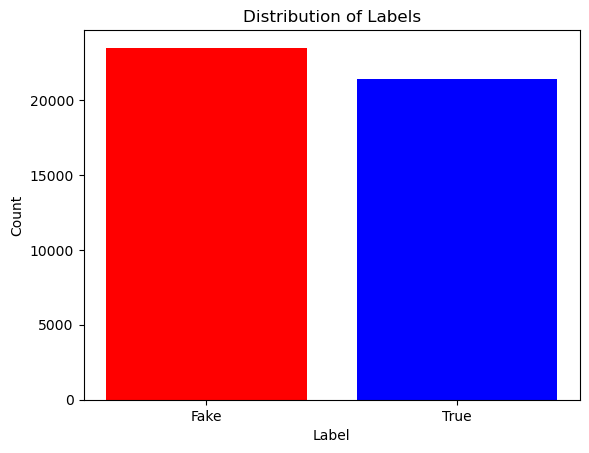

In [7]:
# Visualisation
label_counts = df['isTrue'].value_counts()
plt.bar(label_counts.index, label_counts.values, color=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Fake', 'True'])
plt.show()

In [8]:
# Download stopwords from NLTK
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
# Text preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [10]:
df.head(5)

,text,isTrue,cleaned_text
0,Donald Trump just couldn t wish all Americans ...,0,donald trump wish americans happy new year lea...
1,House Intelligence Committee Chairman Devin Nu...,0,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",0,friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",0,christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,0,pope francis used annual christmas day message...


In [11]:
# Split dataset into train and test sets
X = df['cleaned_text']
y = df['isTrue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
df

In [ ]:
# Train Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

In [ ]:
# Evaluate model
y_pred = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1], ['Fake', 'Real'])
plt.yticks([0, 1], ['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()